In [1]:
from uscode import USCode
from search import SearchEngine

In [2]:
def id_to_location(elem_id):
    return tuple(div[1:] for div in elem_id.split('/'))

def location_info(loc):
    return "Title {:3} Section {:5} ".format(*loc)

In [3]:
usc = USCode.from_json('data/json/usc201901.json')

In [4]:
se = SearchEngine(usc)
cn = se.citation_network

In [5]:
from citation_network import CitationNetwork

cn = CitationNetwork(usc.get_sections())

print("Nodes", len(cn.graph.nodes))
print("Edges", len(cn.graph.edges))
total_weight = sum(w for _, _, w in cn.graph.edges.data('weight'))
print("Weight", total_weight)

Nodes 64134
Edges 150688
Weight 235110


In [6]:
sorted_indeg = sorted(cn.graph.nodes, key=lambda x: cn.graph.in_degree(x), reverse=True)
sorted_outdeg = sorted(cn.graph.nodes, key=lambda x: cn.graph.out_degree(x), reverse=True)

def show_node_info(node):
    print(location_info(id_to_location(node)),
          "In: {:>3}".format(cn.graph.in_degree(node)),
          "Out: {:>3}".format(cn.graph.out_degree(node)))

print("Highest Indegree:")
for node in sorted_indeg[:5]:
    show_node_info(node)

print("\nHighest Outdegree:")
for node in sorted_outdeg[:5]:
    show_node_info(node)

Highest Indegree:
Title 6   Section 542    In: 856 Out:  20
Title 10  Section 3001   In: 851 Out:  16
Title 7   Section 8701   In: 700 Out:  36
Title 26  Section 1      In: 688 Out: 169
Title 10  Section 101    In: 616 Out:  51

Highest Outdegree:
Title 31  Section 1113   In: 525 Out: 269
Title 42  Section 201    In: 222 Out: 257
Title 3   Section 301    In: 395 Out: 214
Title 26  Section 1      In: 688 Out: 169
Title 42  Section 1396a  In:  98 Out: 163


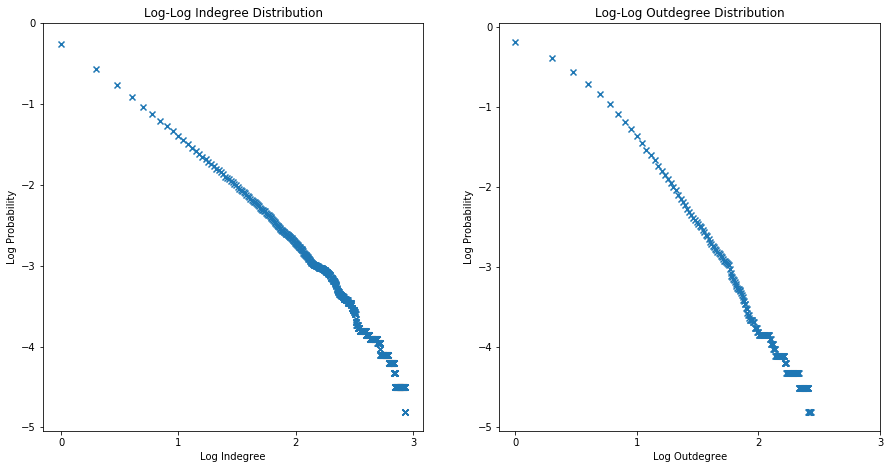

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x_range = np.arange(1000, -1, -1)
y_indeg, y_outdeg = [], []

i1 = i2 = 0
for x in x_range:
    while i1 < len(sorted_indeg) and cn.graph.in_degree(sorted_indeg[i1]) >= x:
        i1 += 1
    y_indeg.append(i1)
    
    while i2 < len(sorted_outdeg) and cn.graph.out_degree(sorted_outdeg[i2]) >= x:
        i2 += 1
    y_outdeg.append(i2)
  
with np.errstate(divide='ignore'):
    x_range = np.log10(x_range)
    y_indeg = np.log10(np.array(y_indeg) / len(cn.graph.nodes))
    y_outdeg = np.log10(np.array(y_outdeg) / len(cn.graph.nodes))

fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))
for ax, y_range, name in zip(axs, [y_indeg, y_outdeg], ["Indegree", "Outdegree"]):
    ax.scatter(x_range, y_range, marker='x')
    
    
    ax.set_title("Log-Log {} Distribution".format(name))
    ax.set_xlabel("Log {}".format(name))
    ax.set_ylabel("Log Probability")
    ax.set_xticks(range(4))
    ax.set_yticks(range(-5, 1))
plt.show()

In [8]:
def show_top_5(results):
    for res in results[:5]:
        print(location_info(res.result.location),
              "Occurrence: {:3} ".format(res.occurrence),
              "Indegree: {:3} ".format(cn.graph.in_degree(res.result.id)),
              "PageRank: {:.2E} ".format(se.pagerank[res.result.id]))
        
results = se.search('copyright', mode='fulltext')

se.rank(results, signal='occurrence')
print("Top 5 by Occurrence:")
show_top_5(results)

se.rank(results, signal='indegree')
print("\nTop 5 by Indegree:")
show_top_5(results)

se.rank(results, signal='pagerank')
print("\nTop 5 by PageRank:")
show_top_5(results)

Top 5 by Occurrence:
Title 17  Section 115    Occurrence: 264  Indegree:   3  PageRank: 1.91E-05 
Title 17  Section 803    Occurrence: 109  Indegree:   3  PageRank: 1.87E-05 
Title 17  Section 111    Occurrence:  97  Indegree:  22  PageRank: 1.49E-04 
Title 17  Section 114    Occurrence:  88  Indegree:   4  PageRank: 4.20E-05 
Title 17  Section 802    Occurrence:  80  Indegree:   3  PageRank: 1.27E-05 

Top 5 by Indegree:
Title 3   Section 301    Occurrence:   1  Indegree: 395  PageRank: 2.35E-03 
Title 11  Section 101    Occurrence:   1  Indegree: 323  PageRank: 1.46E-03 
Title 26  Section 501    Occurrence:   2  Indegree: 251  PageRank: 1.00E-03 
Title 47  Section 609    Occurrence:   1  Indegree: 138  PageRank: 7.04E-04 
Title 5   Section 5314   Occurrence:   1  Indegree: 127  PageRank: 1.13E-03 

Top 5 by PageRank:
Title 3   Section 301    Occurrence:   1  Indegree: 395  PageRank: 2.35E-03 
Title 11  Section 101    Occurrence:   1  Indegree: 323  PageRank: 1.46E-03 
Title 5   Secti

In [9]:
def show_top_5(results):
    for res in results[:5]:
        print(location_info(res.result.location),
              "Occurrence: {:3} ".format(res.occurrence),
              "Indegree: {:3} ".format(cn.graph.in_degree(res.result.id)),
              "PageRank: {:.2E} ".format(se.pagerank[res.result.id]))
        
results = se.search('(copyright OR property) AND NOT legal', mode='boolean')

se.rank(results, signal='occurrence')
print("Top 5 by Occurrence:")
show_top_5(results)

se.rank(results, signal='indegree')
print("\nTop 5 by Indegree:")
show_top_5(results)

se.rank(results, signal='pagerank')
print("\nTop 5 by PageRank:")
show_top_5(results)

Top 5 by Occurrence:
Title 10  Section 2687   Occurrence: 319  Indegree:  40  PageRank: 4.25E-04 
Title 26  Section 856    Occurrence: 228  Indegree:  23  PageRank: 7.15E-05 
Title 12  Section 1831q  Occurrence: 207  Indegree:   5  PageRank: 3.74E-05 
Title 26  Section 48     Occurrence: 161  Indegree: 170  PageRank: 3.97E-04 
Title 26  Section 2032A  Occurrence: 124  Indegree:   4  PageRank: 1.26E-05 

Top 5 by Indegree:
Title 6   Section 542    Occurrence:   6  Indegree: 856  PageRank: 3.08E-03 
Title 26  Section 1      Occurrence:  15  Indegree: 688  PageRank: 3.44E-03 
Title 10  Section 101    Occurrence:   1  Indegree: 616  PageRank: 2.00E-03 
Title 31  Section 1113   Occurrence:   3  Indegree: 525  PageRank: 2.13E-03 
Title 3   Section 301    Occurrence:   4  Indegree: 395  PageRank: 2.35E-03 

Top 5 by PageRank:
Title 26  Section 1      Occurrence:  15  Indegree: 688  PageRank: 3.44E-03 
Title 6   Section 542    Occurrence:   6  Indegree: 856  PageRank: 3.08E-03 
Title 3   Secti